In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df=pd.read_csv("/Users/fel/code/BlueSpirit1993/hdb_resale_chat_bot/data/intermediate/data_concat.csv")

/var/folders/0v/s2ctb70n01q4rpp9lkjdk5c40000gn/T/ipykernel_21888/2768394223.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/Users/fel/code/BlueSpirit1993/hdb_resale_chat_bot/data/intermediate/data_concat.csv")


In [5]:
df=df.drop(columns="year")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949511 entries, 0 to 949510
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                949511 non-null  object 
 1   town                 949511 non-null  object 
 2   flat_type            949511 non-null  object 
 3   block                949511 non-null  object 
 4   street_name          949511 non-null  object 
 5   storey_range         949511 non-null  object 
 6   floor_area_sqm       949511 non-null  float64
 7   flat_model           949511 non-null  object 
 8   lease_commence_date  949511 non-null  int64  
 9   resale_price         949511 non-null  float64
 10  remaining_lease      240461 non-null  object 
 11  year                 949511 non-null  int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 86.9+ MB


In [141]:
df["price_per_sqm"]=df["resale_price"]/df["floor_area_sqm"]
df["month"] = pd.to_datetime(df["month"])
df["lease_commence_date"] = pd.to_datetime(df["lease_commence_date"])
df["year"] = df["month"].dt.year
df["mth"] = df["month"].dt.month

## Resale prices over time

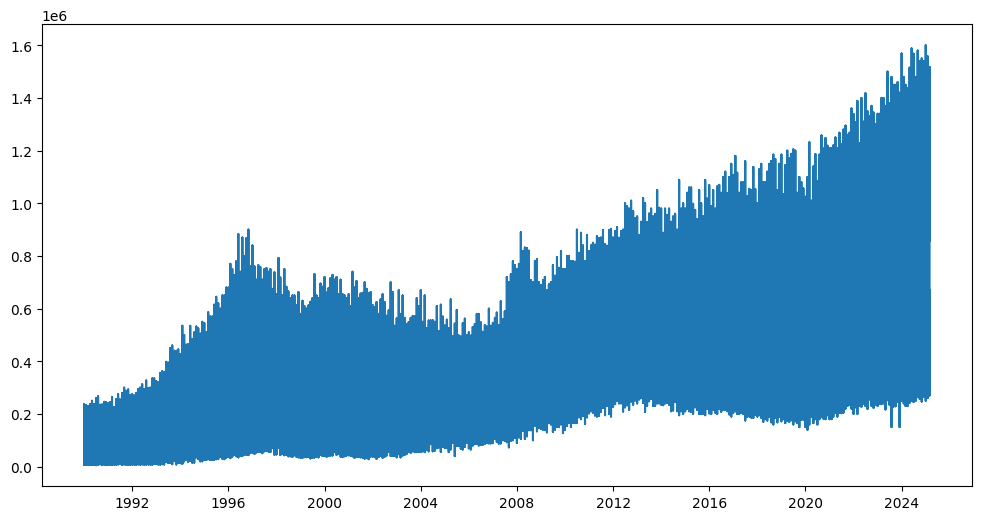

In [117]:
plt.figure(figsize=(12, 6))
plt.plot(df["month"],df["resale_price"])

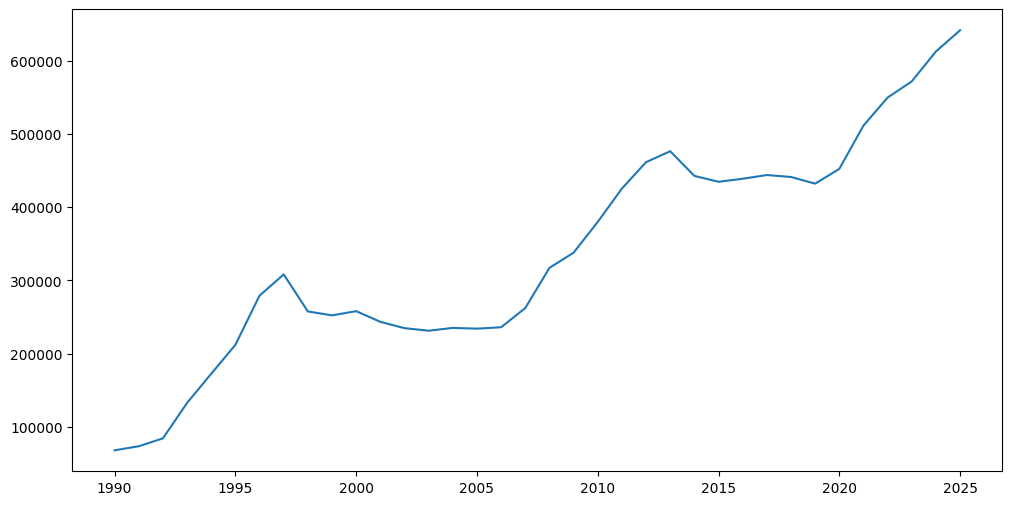

In [118]:
plt.figure(figsize=(12, 6))
df_grouped = df.groupby("year")["resale_price"].mean().reset_index()
plt.plot(df_grouped["year"], df_grouped["resale_price"])

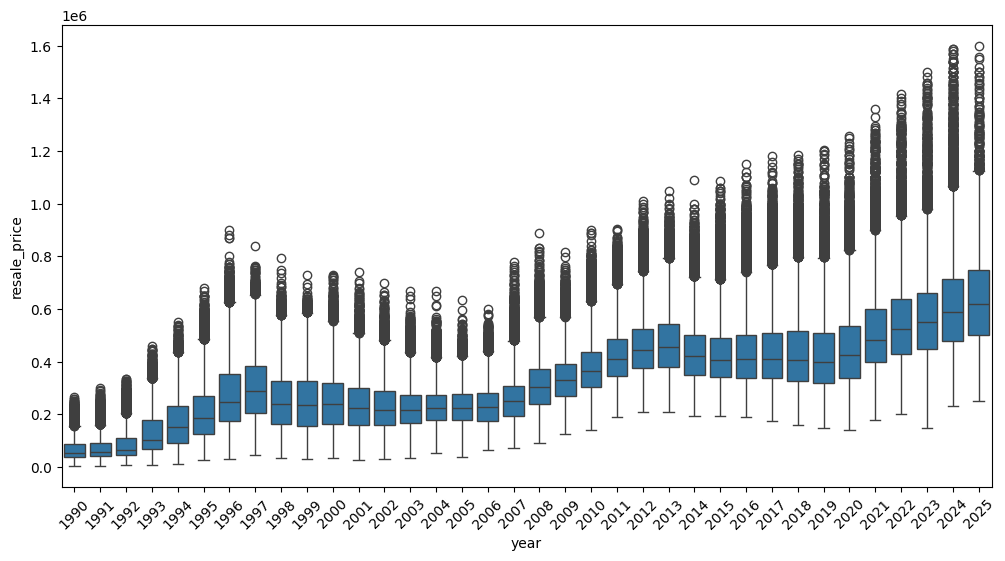

In [119]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="year", y="resale_price", data=df)
plt.xticks(rotation=45)  
plt.show()

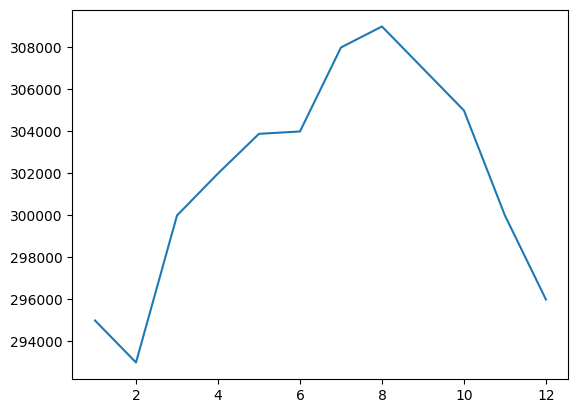

In [152]:
df_grouped = df.groupby("mth")["resale_price"].median().reset_index()
plt.plot(df_grouped["mth"], df_grouped["resale_price"])

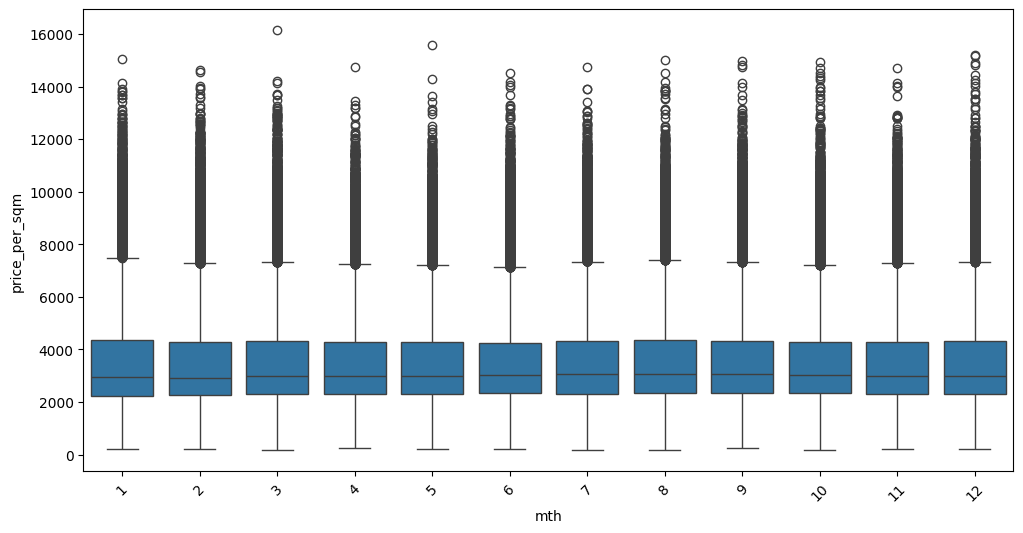

In [154]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="mth", y="price_per_sqm" ,data=df)
plt.xticks(rotation=45)  
plt.show()

## Resale price distribution

<Axes: xlabel='resale_price', ylabel='Count'>

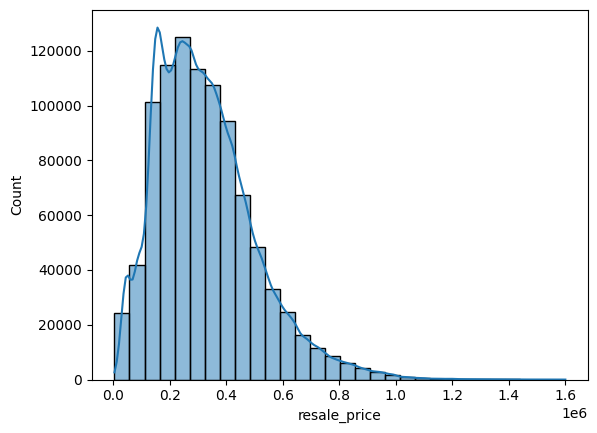

In [122]:
sns.histplot(df["resale_price"], bins=30, kde=True)

<Axes: xlabel='price_per_sqm', ylabel='Count'>

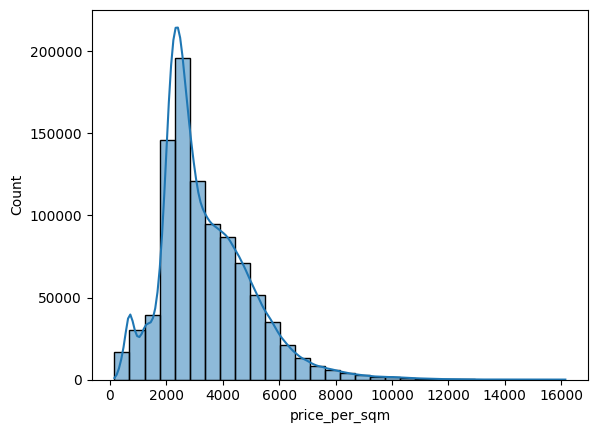

In [70]:
sns.histplot(df["price_per_sqm"], bins=30, kde=True)

## Locations

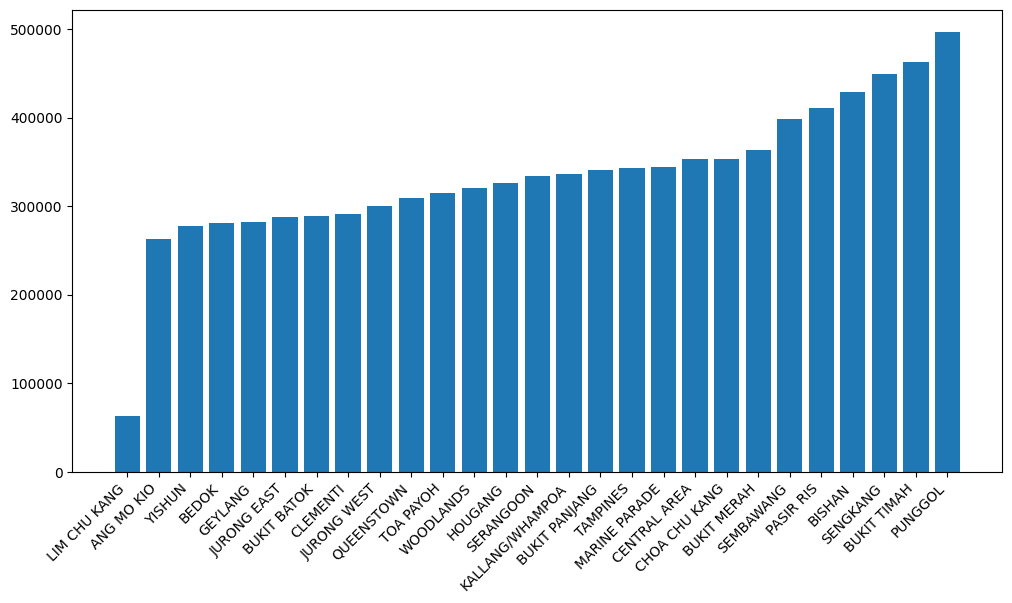

In [123]:
#Resale prices across towns
plt.figure(figsize=(12, 6))
df_grouped = df.groupby("town")["resale_price"].mean().reset_index().sort_values(by="resale_price")
plt.bar(df_grouped["town"], df_grouped["resale_price"])
plt.xticks(rotation=45, ha="right")
plt.show()

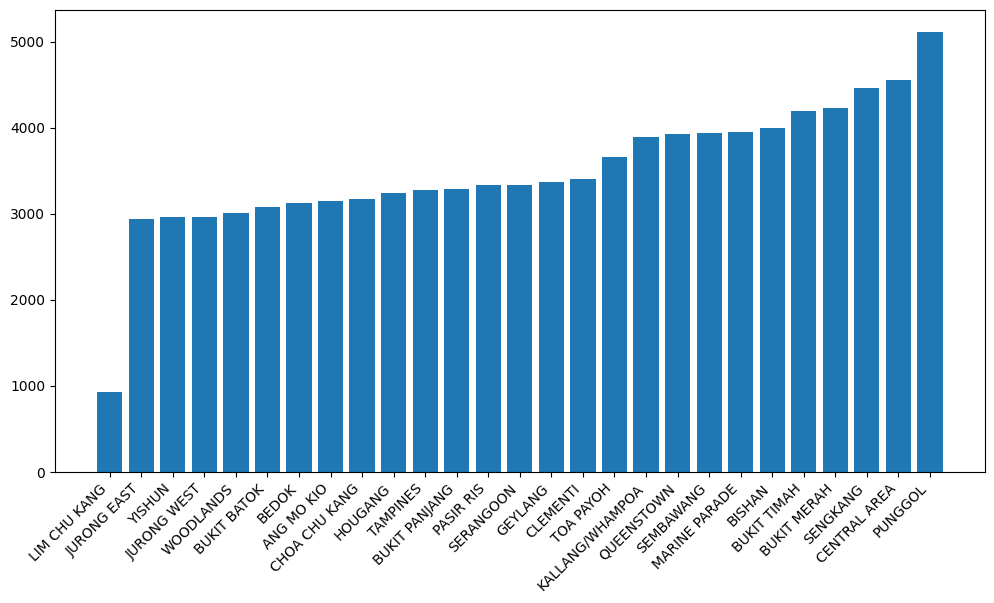

In [116]:
#Resale prices across towns
plt.figure(figsize=(12, 6))
df_grouped = df.groupby("town")["price_per_sqm"].mean().reset_index().sort_values(by="price_per_sqm")
plt.bar(df_grouped["town"], df_grouped["price_per_sqm"])
plt.xticks(rotation=45, ha="right")
plt.show()

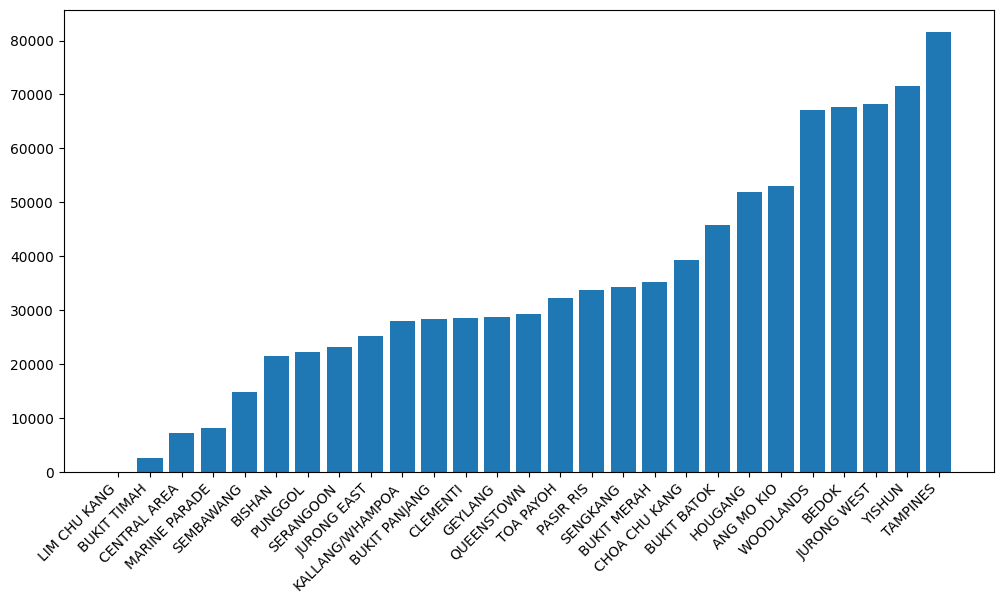

In [74]:
#Num transactions across towns
plt.figure(figsize=(12, 6))
df_grouped = df.groupby("town").size().reset_index().sort_values(by=0)
plt.bar(df_grouped["town"], df_grouped[0])
plt.xticks(rotation=45, ha="right")
plt.show()

In [24]:
town_region_mapping = {
    "TAMPINES": "East",
    "YISHUN": "North",
    "JURONG WEST": "West",
    "BEDOK": "East",
    "WOODLANDS": "North",
    "ANG MO KIO": "Central",
    "HOUGANG": "North-East",
    "BUKIT BATOK": "West",
    "CHOA CHU KANG": "West",
    "BUKIT MERAH": "Central",
    "SENGKANG": "North-East",
    "PASIR RIS": "East",
    "TOA PAYOH": "Central",
    "QUEENSTOWN": "Central",
    "GEYLANG": "Central",
    "CLEMENTI": "West",
    "BUKIT PANJANG": "West",
    "KALLANG/WHAMPOA": "Central",
    "JURONG EAST": "West",
    "SERANGOON": "North-East",
    "PUNGGOL": "North-East",
    "BISHAN": "Central",
    "SEMBAWANG": "North",
    "MARINE PARADE": "East",
    "CENTRAL AREA": "Central",
    "BUKIT TIMAH": "Central",
    "LIM CHU KANG": "West",
}
df["region"] = df["town"].map(town_region_mapping)

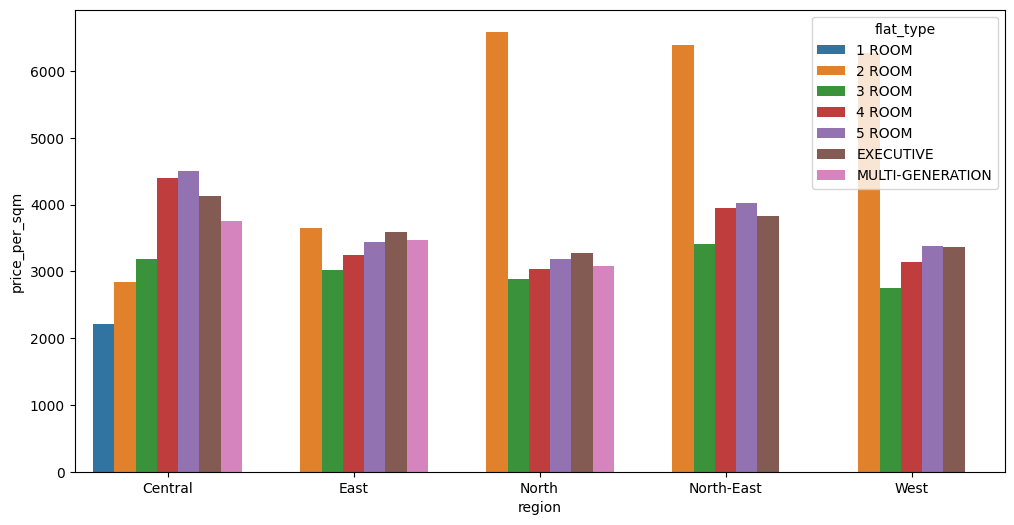

In [159]:
#Resale prices across regions
df_grouped = df.groupby(["region", "flat_type"])["price_per_sqm"].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped, x="region", y="price_per_sqm", hue="flat_type")
plt.show()

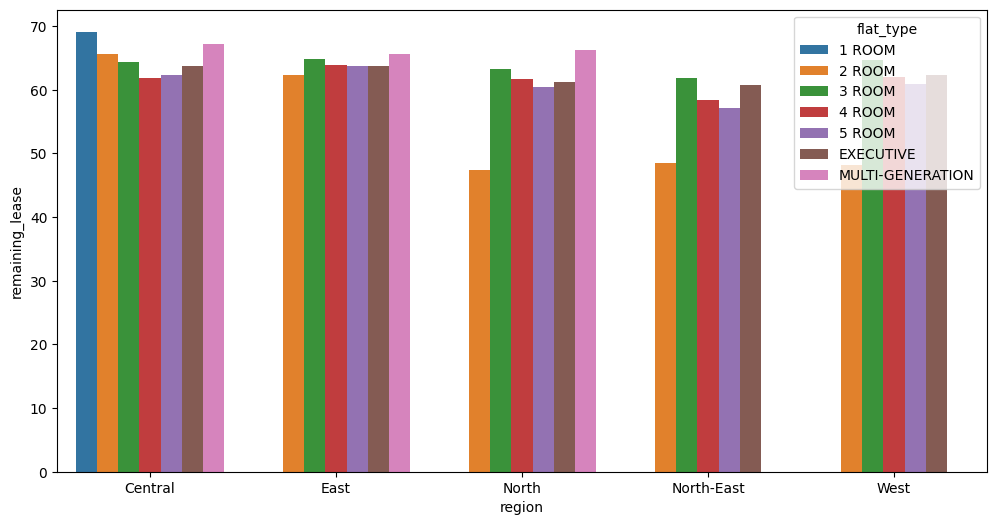

In [160]:
#Resale prices across regions
df_grouped = df.groupby(["region", "flat_type"])["remaining_lease"].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped, x="region", y="remaining_lease", hue="flat_type")
plt.show()

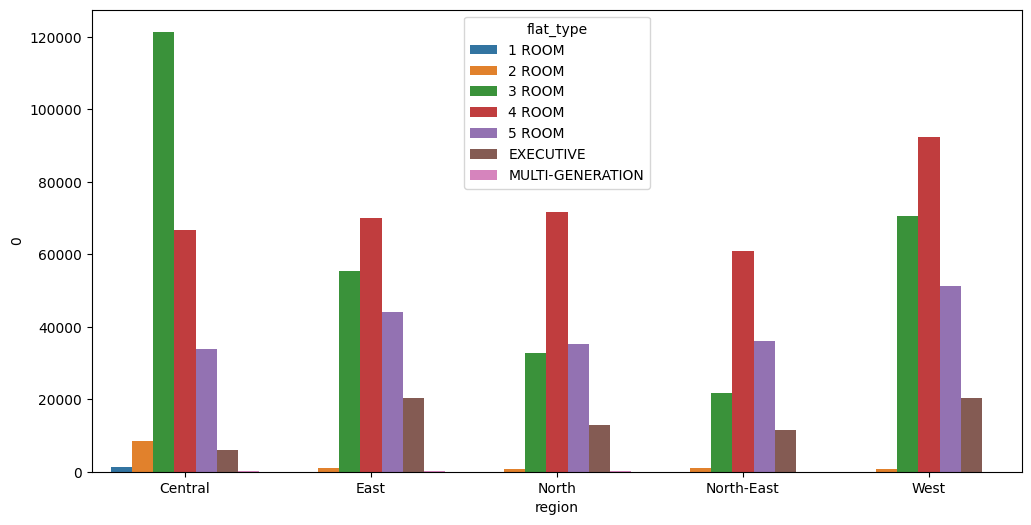

In [158]:
#Resale prices across regions
df_grouped = df.groupby(["region", "flat_type"]).size().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped, x="region", y=0, hue="flat_type")
plt.show()

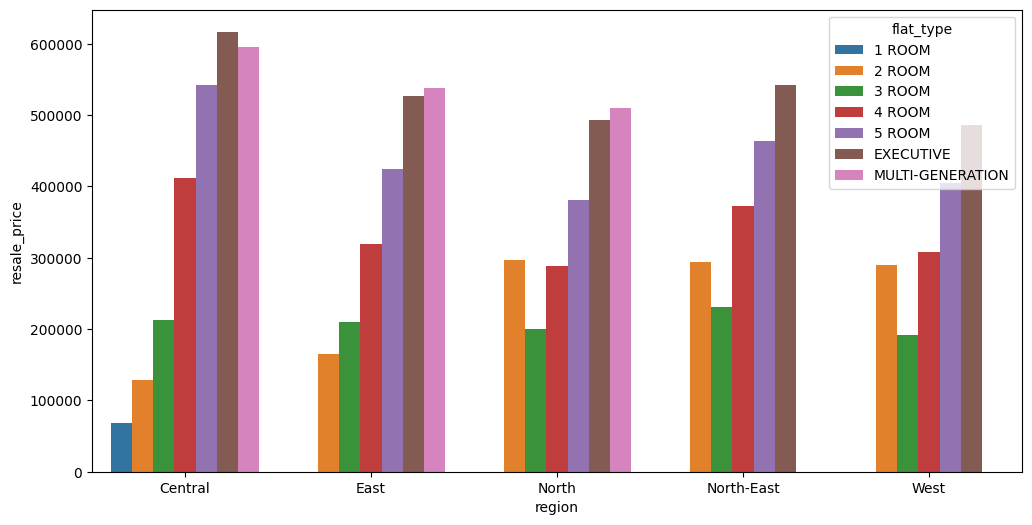

In [124]:
#Resale prices across regions
df_grouped = df.groupby(["region", "flat_type"])["resale_price"].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped, x="region", y="resale_price", hue="flat_type")
plt.show()

In [35]:
df["flat_type"]=np.where(df["flat_type"]=="MULTI GENERATION","MULTI-GENERATION",df["flat_type"])

In [36]:
df["flat_type"].value_counts()

flat_type
4 ROOM              361989
3 ROOM              301480
5 ROOM              200627
EXECUTIVE            71059
2 ROOM               12499
1 ROOM                1312
MULTI-GENERATION       545
Name: count, dtype: int64

In [88]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,region,year,mth,price_per_sqm
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,Central,1990,1,290.322581
1010,1990-01-01,ANG MO KIO,3 ROOM,230,ANG MO KIO AVE 3,07 TO 09,82.0,NEW GENERATION,1978,60000.0,NaN,Central,1990,1,731.707317
1009,1990-01-01,ANG MO KIO,3 ROOM,223,ANG MO KIO AVE 1,10 TO 12,67.0,NEW GENERATION,1978,37000.0,NaN,Central,1990,1,552.238806
1008,1990-01-01,HOUGANG,5 ROOM,302,HOUGANG AVE 5,01 TO 03,131.0,MODEL A,1983,126000.0,NaN,North-East,1990,1,961.832061
1007,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN,Central,1990,1,193.548387


In [125]:
df_grouped = df.groupby(["town", "year"])["resale_price"].mean().reset_index()
df_grouped

,town,year,resale_price
0,ANG MO KIO,1990,59264.292383
1,ANG MO KIO,1991,58368.396648
2,ANG MO KIO,1992,65069.577689
3,ANG MO KIO,1993,104482.918188
4,ANG MO KIO,1994,133834.338350
...,...,...,...
919,YISHUN,2021,440459.884000
920,YISHUN,2022,480272.374312
921,YISHUN,2023,499060.283139
922,YISHUN,2024,541018.211268


In [126]:
df_grouped["price_change_pct"] = df_grouped.groupby("town")["resale_price"].pct_change() * 100
df_grouped

,town,year,resale_price,price_change_pct
0,ANG MO KIO,1990,59264.292383,NaN
1,ANG MO KIO,1991,58368.396648,-1.511696
2,ANG MO KIO,1992,65069.577689,11.480838
3,ANG MO KIO,1993,104482.918188,60.571072
4,ANG MO KIO,1994,133834.338350,28.092075
...,...,...,...,...
919,YISHUN,2021,440459.884000,14.824725
920,YISHUN,2022,480272.374312,9.038846
921,YISHUN,2023,499060.283139,3.911928
922,YISHUN,2024,541018.211268,8.407387


In [127]:
avg_growth = df_grouped.groupby("town")["price_change_pct"].mean().reset_index()

rising_towns = avg_growth.sort_values("price_change_pct", ascending=False).head(5)
falling_towns = avg_growth.sort_values("price_change_pct", ascending=True).head(5)

In [128]:
rising_towns = avg_growth.sort_values("price_change_pct", ascending=False).head(5)
rising_towns

,town,price_change_pct
15,LIM CHU KANG,18.473936
20,SEMBAWANG,16.701951
19,QUEENSTOWN,9.716214
21,SENGKANG,9.656766
24,TOA PAYOH,8.743893


In [129]:
falling_towns = avg_growth.sort_values("price_change_pct", ascending=True).head(5)
falling_towns

,town,price_change_pct
18,PUNGGOL,4.564184
3,BUKIT BATOK,6.196635
5,BUKIT PANJANG,6.324021
22,SERANGOON,6.412470
12,JURONG EAST,6.615088


## Flat type

In [111]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,region,year,mth,price_per_sqm
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,Central,1990,1,290.322581
1010,1990-01-01,ANG MO KIO,3 ROOM,230,ANG MO KIO AVE 3,07 TO 09,82.0,NEW GENERATION,1978,60000.0,NaN,Central,1990,1,731.707317
1009,1990-01-01,ANG MO KIO,3 ROOM,223,ANG MO KIO AVE 1,10 TO 12,67.0,NEW GENERATION,1978,37000.0,NaN,Central,1990,1,552.238806
1008,1990-01-01,HOUGANG,5 ROOM,302,HOUGANG AVE 5,01 TO 03,131.0,MODEL A,1983,126000.0,NaN,North-East,1990,1,961.832061
1007,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN,Central,1990,1,193.548387


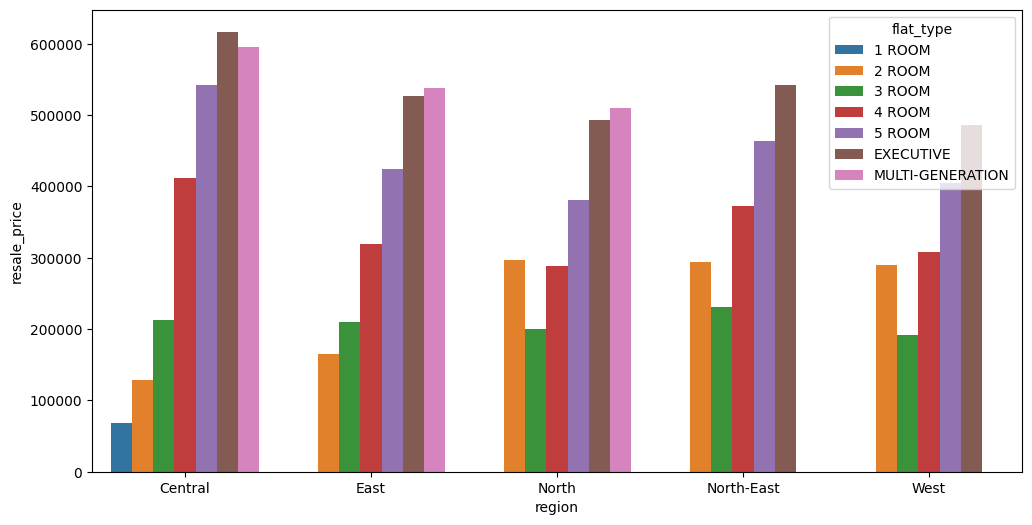

In [131]:
#Resale prices across regions
df_grouped = df.groupby(["region", "flat_type"])["resale_price"].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped, x="region", y="resale_price", hue="flat_type")
plt.show()

<Axes: xlabel='floor_area_sqm', ylabel='resale_price'>

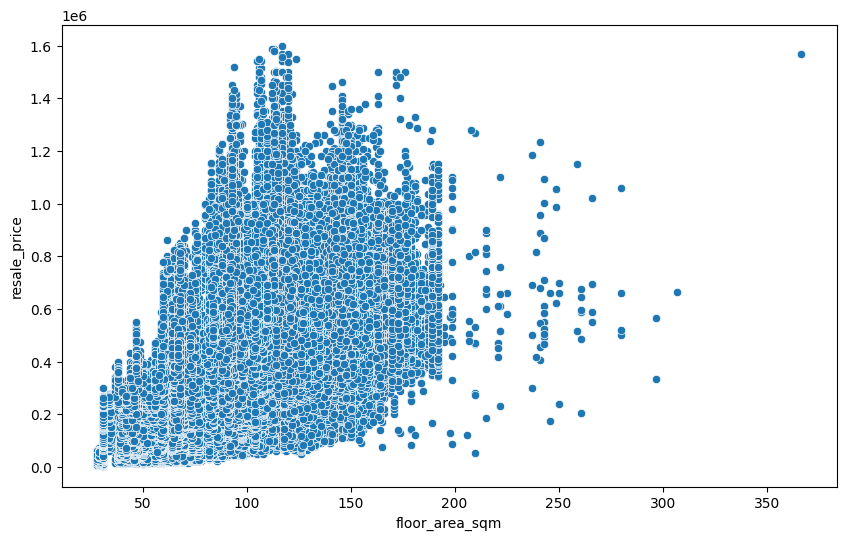

In [137]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["floor_area_sqm"], y=df["resale_price"])

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 949511 entries, 0 to 949510
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                949511 non-null  datetime64[ns]
 1   town                 949511 non-null  object        
 2   flat_type            949511 non-null  object        
 3   block                949511 non-null  object        
 4   street_name          949511 non-null  object        
 5   storey_range         949511 non-null  object        
 6   floor_area_sqm       949511 non-null  float64       
 7   flat_model           949511 non-null  object        
 8   lease_commence_date  949511 non-null  datetime64[ns]
 9   resale_price         949511 non-null  float64       
 10  remaining_lease      949511 non-null  int32         
 11  region               949511 non-null  object        
 12  year                 949511 non-null  int32         
 13  mth                

In [142]:
df["remaining_lease"]=df["lease_commence_date"].dt.year+99-df["year"]

In [180]:
df[(df["street_name"]=="BISHAN ST 24") & (df["block"]=="275A") & (df["storey_range"]=="34 TO 36") & (df["resale_price"]==808000.0)]

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,region,year,mth,price_per_sqm,remaining_lease_bins
747043,2017-01-01,BISHAN,4 ROOM,275A,BISHAN ST 24,34 TO 36,95.0,DBSS,1970-01-01 00:00:00.000002011,808000.0,52,Central,2017,1,8505.263158,"(50, 60]"


In [174]:
df.sample(5)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,region,year,mth,price_per_sqm,remaining_lease_bins
499609,2006-07-01,ANG MO KIO,3 ROOM,152,ANG MO KIO AVE 5,01 TO 03,68.0,New Generation,1970-01-01 00:00:00.000001981,113000.0,63,Central,2006,7,1661.764706,"(60, 70]"
216144,1998-10-01,TAMPINES,4 ROOM,230C,TAMPINES ST 24,10 TO 12,107.0,MODEL A,1970-01-01 00:00:00.000001993,322000.0,71,East,1998,10,3009.345794,"(70, 80]"
755974,2017-07-01,SENGKANG,4 ROOM,211A,COMPASSVALE LANE,07 TO 09,93.0,Model A,1970-01-01 00:00:00.000002013,415000.0,52,North-East,2017,7,4462.365591,"(50, 60]"
512800,2007-01-01,TOA PAYOH,5 ROOM,215,LOR 8 TOA PAYOH,04 TO 06,119.0,Standard,1970-01-01 00:00:00.000001975,295000.0,62,Central,2007,1,2478.991597,"(60, 70]"
912915,2023-11-01,SEMBAWANG,EXECUTIVE,468B,ADMIRALTY DR,13 TO 15,137.0,Premium Apartment,1970-01-01 00:00:00.000002001,667000.0,46,North,2023,11,4868.613139,"(40, 50]"


In [169]:
df["remaining_lease"].describe()

count    949511.000000
mean         62.405064
std           9.611320
min          44.000000
25%          54.000000
50%          64.000000
75%          70.000000
max          79.000000
Name: remaining_lease, dtype: float64

In [170]:
bins = [40, 50, 60, 70, 80]  

df["remaining_lease_bins"] = pd.cut(df["remaining_lease"], bins=bins)

/var/folders/0v/s2ctb70n01q4rpp9lkjdk5c40000gn/T/ipykernel_21888/109616538.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(["remaining_lease_bins"])["resale_price"].mean().reset_index()


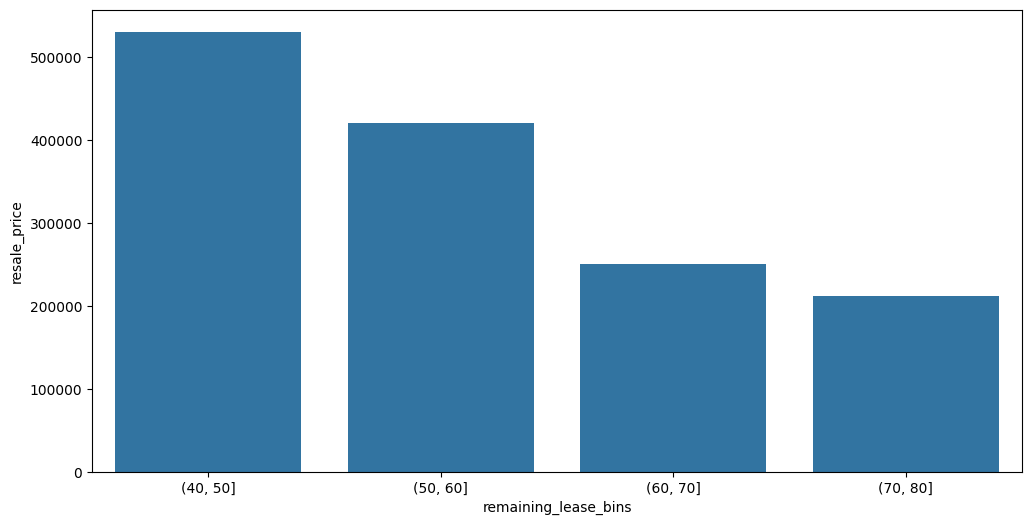

In [171]:
#Resale prices vs remaining lease (bins)
df_grouped = df.groupby(["remaining_lease_bins"])["resale_price"].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped, x="remaining_lease_bins", y="resale_price")
plt.show()

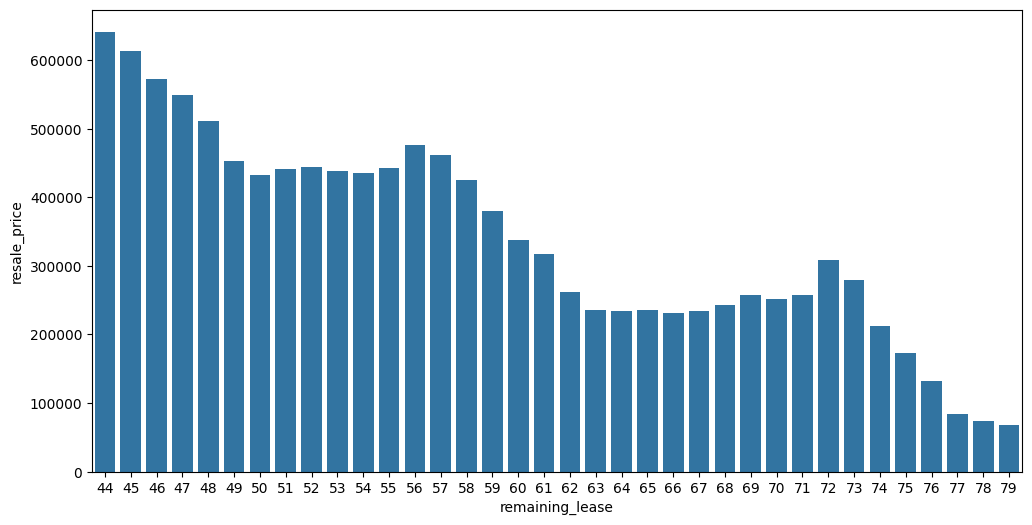

In [172]:
#Resale prices vs remaining lease (bins)
df_grouped = df.groupby(["remaining_lease"])["resale_price"].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped, x="remaining_lease", y="resale_price")
plt.show()